# Results

## Setup

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


c:\Users\samue\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
## Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Reading in data
deco_data = pd.read_csv("./Data/deco_clean_final.csv")

### Final Cleaning

In [4]:
deco_data.head()

,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,year,deaths_a,deaths_b,civilian_deaths,unknown,best,high,low,electoral_vio,electoral_vio_uncertainty,electoral_side_a_inc,electoral_side_b_inc,electoral_perpetrator,electoral_targets,electoral_type,electoral_timing,ucdp_ged,Afghanistan,Albania,Algeria,Angola,Bangladesh,Benin,Bolivia,Brazil,Burundi,Cambodia (Kampuchea),Central African Republic,Colombia,Congo,DR Congo (Zaire),Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Ethiopia,Fiji,Gambia,Georgia,Ghana,Guatemala,Guinea,Guinea-Bissau,Haiti,Honduras,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Kenya,Kosovo,Kyrgyzstan,Lebanon,Lesotho,Libya,Madagascar (Malagasy),Malawi,Malaysia,Mali,Mauritania,Mexico,Moldova,Mozambique,Myanmar (Burma),Namibia,Nepal,Nicaragua,Nigeria,Pakistan,Papua New Guinea,Peru,Philippines,Russia (Soviet Union),Senegal,Serbia (Yugoslavia),Sierra Leone,Somalia,South Africa,Spain,Sri Lanka,Sudan,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United Kingdom,Venezuela,Yemen (North Yemen),Zambia,Zimbabwe (Rhodesia),Africa,Americas,Asia,Europe,Middle East,electoral_vio_uncertainty_0,electoral_vio_uncertainty_1,electoral_vio_uncertainty_2,type_of_violence_1,type_of_violence_2,type_of_violence_3,type_of_violence_4,electoral_perpetrator_1,electoral_perpetrator_2,electoral_perpetrator_3,electoral_perpetrator_4,side_a_Civilians,side_a_ExternActors,side_a_Militia,side_a_Other,side_a_PoliticalSupporters,side_a_Politicians,Public officials,side_a_RebelGroup,side_a_SecurityForces,side_a_Unclear,side_b_Civilians,side_b_Militia,side_b_Other,side_b_PoliticalSupporters,side_b_Politicians,side_b_PublicOfficials,side_b_RebelGroup,side_b_SecurityForces,side_b_Unclear,electoral_purpose_disrupt,electoral_purpose_divergent affiliations,electoral_purpose_crack down on protest and/or riot,electoral_purpose_protect results,electoral_purpose_unclear,electoral_purpose_spell,electoral_purpose_eliminate opponent,electoral_purpose_retaliate violent acts,electoral_purpose_overturn results,electoral_purpose_secure elections,electoral_purpose_preemptive violence,electoral_purpose_prevent from voting,electoral_purpose_shape results,electoral_purpose_retaliate for voting for other candidate,electoral_purpose_repress opposition,electoral_purpose_punishment,electoral_purpose_crack down on prostest and/or riot,electoral_purpose_oppose democratic conduct,electoral_purpose_intimidate opponent,electoral_purpose_demand democratic conduct,electoral_purpose_hinder electoral misconduct,electoral_purpose_retaliate for voting for alternative candidate,electoral_purpose_crack down on riot and/or protest,electoral_purpose_retaliate for voting for candidate,electoral_purpose_forcibly displace groups in order to shape results,electoral_purpose_retaliate acts in electoral process,electoral_purpose_prevent electoral misconduct,electoral_purpose_Unknown,electoral_purpose_secure election,electoral_purpose_crackdown on protest and/or riot,electoral_purpose_call for change in electoral process,electoral_purpose_Secure elections,electoral_purpose_intimidate voters,electoral_purpose_crack down on riots and/or protests,electoral_purpose_crack down on protest and/or riot/retaliate violent events,electoral_purpose_Unclear,electoral_purpose_diverging affiliations,electoral_targets_2,electoral_targets_6,electoral_targets_3,electoral_targets_5,electoral_targets_10,electoral_targets_1,electoral_targets_9,electoral_targets_7,electoral_targets_11,electoral_targets_-99,electoral_targets_8,electoral_targets_4,electoral_type_2,electoral_type_1,electoral_type_3,electoral_type_4,electoral_type_5,"electoral_type_2,3","electoral_type_1,3","electoral_type_1,4",electoral_timing_2,electoral_timing_1,electoral_timing_3,electoral_timing_4,electoral_timing_8,GDP (constant 2015 US$),GDP growth (annual %),GDP per capita (constant 2015 US$),Gini index,"Inflation, consumer prices (annual %)",Political Stability and Absence of Violence/Terrorism: Estimate,"Unemployment,

In [5]:
# Unique value counts of target variable (ensuring little to no sparsity)
deco_data.electoral_vio_uncertainty.value_counts()

electoral_vio_uncertainty
0    2510
2    1095
1     628
Name: count, dtype: int64

In [6]:
# Consolidating electoral purpose columns

## consolidating electoral purpose columns that have similarly spelled names
deco_data['electoral_purpose_secure elections'] = np.where(((deco_data['electoral_purpose_secure election']==1)|
                                                            (deco_data['electoral_purpose_Secure elections']==1)|
                                                           (deco_data['electoral_purpose_secure elections']==1)), 1 ,0)

deco_data['electoral_purpose_crack down on protest and/or riot'] = np.where(((deco_data['electoral_purpose_crack down on prostest and/or riot']==1)|
                                                                            (deco_data['electoral_purpose_crack down on protest and/or riot']==1) |
                                                                             (deco_data['electoral_purpose_crack down on protest and/or riot/retaliate violent events']==1)|
                                                                             (deco_data['electoral_purpose_crack down on riot and/or protest']==1)|
                                                                             (deco_data['electoral_purpose_crack down on riots and/or protests']==1)|
                                                                             (deco_data['electoral_purpose_crackdown on protest and/or riot']==1)), 1, 0)

deco_data['electoral_purpose_divergent affiliations'] = np.where(((deco_data['electoral_purpose_divergent affiliations']==1)|
                                                                  deco_data['electoral_purpose_diverging affiliations']==1), 1, 0)

deco_data['electoral_purpose_unclear'] = np.where(((deco_data['electoral_purpose_unclear']==1)|
                                                  (deco_data['electoral_purpose_Unclear']==1)), 1, 0)

## drop superfluous columns 
deco_data = deco_data.drop(columns=['electoral_purpose_secure election','electoral_purpose_Secure elections','electoral_purpose_crack down on prostest and/or riot','electoral_purpose_crack down on protest and/or riot/retaliate violent events','electoral_purpose_crack down on riot and/or protest','electoral_purpose_crack down on riots and/or protests','electoral_purpose_crackdown on protest and/or riot','electoral_purpose_diverging affiliations',])


In [7]:
# Dropping extraneous columns
deco_data = deco_data.drop(columns = ['conflict_new_id', # dropping for simplicity
                                      'dyad_new_id', # dropping for simplicity
                                      'year', # not factoring time into model, so dropping
                                      'side_a_new_id', # already one hot encoded
                                      'side_b_new_id', # already one hot encoded
                                      'unknown', # dropping high, low, and unknown deaths estimates for simplicity (keeping "best")
                                      'high',
                                      'low',
                                      'electoral_vio', # dropping for simplicity
                                      'electoral_perpetrator', # # already one hot encoded
                                      'electoral_targets', # already one hot encoded
                                      'electoral_type', # already one hot encoded
                                      'electoral_timing', # already one hot encoded
                                      'ucdp_ged'])

In [8]:
deco_data.shape

(4233, 183)

## Train-test split

In [9]:
# Dropping object columns
deco_data = deco_data.select_dtypes(exclude=['object'])

In [10]:
# Target and indicator features
X = deco_data.drop(columns = ['electoral_vio_uncertainty', 'electoral_vio_uncertainty_1', 'electoral_vio_uncertainty_2', 'electoral_vio_uncertainty_0'])
y= deco_data['electoral_vio_uncertainty']

In [11]:
# Train-test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Random forest

### Preliminary untuned random forest model

In [12]:
# Training RF model (unpruned)
rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       774
           1       0.71      0.55      0.62       183
           2       0.92      0.92      0.92       313

    accuracy                           0.88      1270
   macro avg       0.84      0.80      0.82      1270
weighted avg       0.87      0.88      0.87      1270

Accuracy on test data: 0.8763779527559055


### Hyperparameter tuning

In [13]:
# Optimal hyperparameters

# Create Random Forest classifier object
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [25, 50, 100],  # Number of trees
    'max_depth': [3, 5, 7, 10, 15],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'max_features': ['sqrt', 'log2'] # Maximum number of features
    #'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

In [14]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Pruned random forest model

In [15]:
# Pruning RF model
rf = RandomForestClassifier(max_features = 'sqrt', 
                            max_depth = 15, 
                            n_estimators = 50, 
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            random_state = 10) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       774
           1       0.70      0.42      0.53       183
           2       0.92      0.91      0.92       313

    accuracy                           0.86      1270
   macro avg       0.83      0.76      0.78      1270
weighted avg       0.85      0.86      0.85      1270

Accuracy on test data: 0.8614173228346457


### Confusion matrix for tuned random forest model

In [16]:
# creating confusion matrix function
def generate_confusion_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1',  'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    

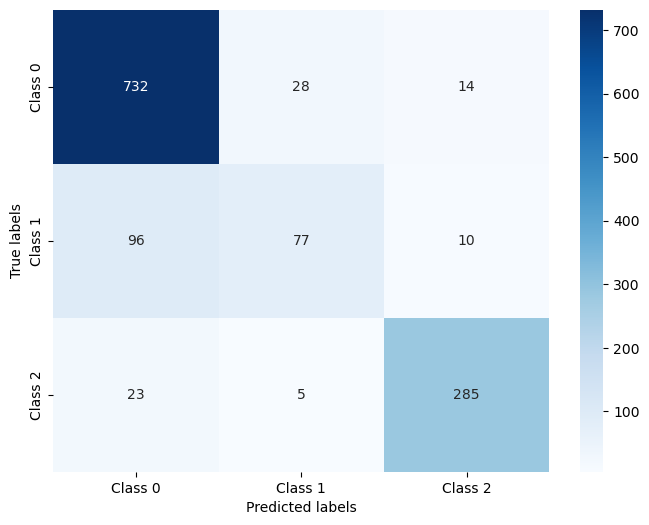

In [41]:
# Confusion matrix = tuned random forest
generate_confusion_matrix(y_test, y_pred)

### Most important features

In [17]:
# Importance of features in RF model
features = X_train.columns  
importances = rf.feature_importances_
pd.DataFrame(X_train.columns, importances).reset_index().sort_values(by="index", ascending=False).rename(columns={"index" :'Importance', 0:'Feature'}).head(20)

,Importance,Feature
178,0.077172,"Unemployment, total (% of total labor force) (..."
172,0.053239,GDP (constant 2015 US$)
71,0.048841,South Africa
165,0.046589,"electoral_type_1,3"
174,0.045702,GDP per capita (constant 2015 US$)
177,0.042772,Political Stability and Absence of Violence/Te...
176,0.037941,"Inflation, consumer prices (annual %)"
3,0.037100,best
123,0.034866,electoral_purpose_spell
173,0.033813,GDP growth (annual %)


In [18]:
# Data set with most important features
deco_best20features = deco_data.loc[:,['electoral_vio_uncertainty',
                                       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                  'South Africa',
                                  'GDP per capita (constant 2015 US$)',
                                  'electoral_type_1,3',
                                  'Gini index',
                                  'Africa',
                                  'Political Stability and Absence of Violence/Terrorism: Estimate',
                                  'electoral_type_1',
                                  'GDP (constant 2015 US$)',
                                  'GDP growth (annual %)',
                                  'Inflation, consumer prices (annual %)',
                                  'electoral_type_3',
                                  'electoral_purpose_divergent affiliations',
                                  'Asia',
                                  'electoral_purpose_spell',
                                  'electoral_targets_3',
                                  'electoral_purpose_disrupt',
                                  'electoral_timing_3',
                                  'Somalia',
                                  'side_b_PoliticalSupporters']]

In [19]:
# Train test splitting data set with 20 most important features
X_best = deco_best20features.drop(columns = ['electoral_vio_uncertainty'])
y_best = deco_best20features.electoral_vio_uncertainty
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.3, random_state=1)


### Pruned random forest model with 20 most important features

In [20]:
# Pruned RF with 20 most important features
rf = RandomForestClassifier(max_features = 'sqrt', 
                            max_depth = 15, 
                            n_estimators = 50, 
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            random_state = 10) 
rf.fit(X_train_best, y_train_best)
y_pred_best = rf.predict(X_test_best)
rf.score(X_test_best, y_test_best)
print(classification_report(y_test_best, y_pred_best))
print("Accuracy on test data:", accuracy_score(y_test_best, y_pred_best))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       774
           1       0.60      0.51      0.55       183
           2       0.90      0.91      0.90       313

    accuracy                           0.85      1270
   macro avg       0.79      0.77      0.78      1270
weighted avg       0.84      0.85      0.85      1270

Accuracy on test data: 0.8503937007874016


In [22]:
# Cross validation scores
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(scores)

[0.83473862 0.84317032 0.82462057 0.85135135 0.86655405]


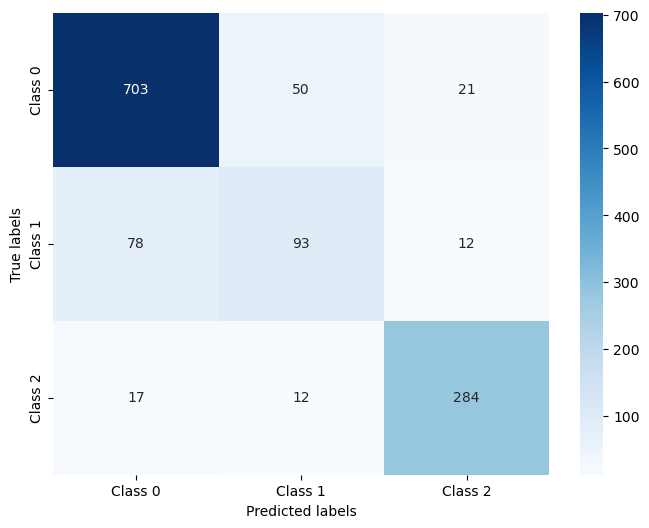

In [47]:
# Confusion matrix - Best features
generate_confusion_matrix(y_test_best, y_pred_best)